# Objective:


The Aim is to explore on the Statistical Analysis of Business Data using Python by exploring the given dataset on Axis Insurance , extracting the insights from the data.

# Context:

 Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

# Data Dictionary:

1)Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).

2)Sex - This is the policy holder's gender, either male or female.

3)BMI - This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.

4)Children - This is an integer indicating the number of children / dependents covered by the insurance plan.

5)Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.

6)Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.

7)Charges​ - Individual medical costs billed to health insurance

# Key Questions:

1.Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

2.Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

3.Is the proportion of smokers significantly different across different regions?

4.Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.


# Import the necessary libraries :

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from   scipy.stats import chi2_contingency   # For Chi-Sq 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import the CSV :

In [5]:
axisdata = pd.read_csv('AxisInsurance.csv',encoding='ISO-8859-1')
df = axisdata.copy()

# Check the first five rows :

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Check the summary of data:

In [96]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338,NaN,NaN,NaN,39.207,14.05,18,27,39,51,64
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338,NaN,NaN,NaN,30.6634,6.09819,15.96,26.2963,30.4,34.6938,53.13
children,1338,NaN,NaN,NaN,1.09492,1.20549,0,0,1,2,5
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338,NaN,NaN,NaN,13270.4,12110,1121.87,4740.29,9382.03,16639.9,63770.4


In [95]:
# Check for missing value in any column
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Observations :

* All the columns have 1338 observations indicating that there are no missing values in the dataset .
* sex, smoker and region are the categorical variables of the dataset which need to be converted from objects.
* There are 4 numerical variables in the dataset.

# Data Preprocessing:

In [11]:
df['sex'] = df.sex.astype('category')
df['smoker'] = df.smoker.astype('category')
df['region'] = df.region.astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


* data type of all the columns have been fixed.

# Exploratory Data Analysis

# Observations on counts On Smokers  based upon Gender:

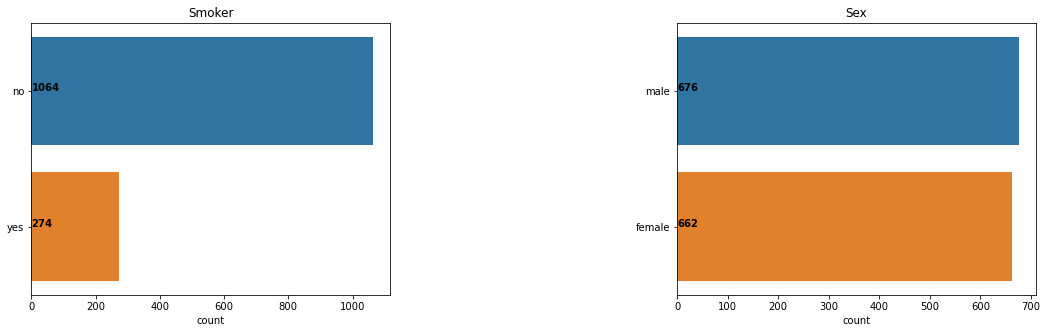

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,5))

g=sns.countplot(y=df.smoker,order=df.smoker.value_counts().index,ax=ax[0])
for i,v in enumerate(df.smoker.value_counts().values):
    g.text(0.5,i,v,weight="bold")
ax[0].set_title("Smoker")
ax[0].set_ylabel("")
    
f=sns.countplot(y=df.sex,order=df["sex"].value_counts().index,ax=ax[1])
for i,v in enumerate(df.sex.value_counts().values):
    f.text(0.5,i,v,weight="bold")
ax[1].set_title("Sex")
ax[1].set_ylabel("")
plt.subplots_adjust(wspace=0.8)

# Observations on Charges based upon Smokers (vs)Non-Smokers across Gender:

Text(0.5, 1.0, 'Charges for non-Smokers ')

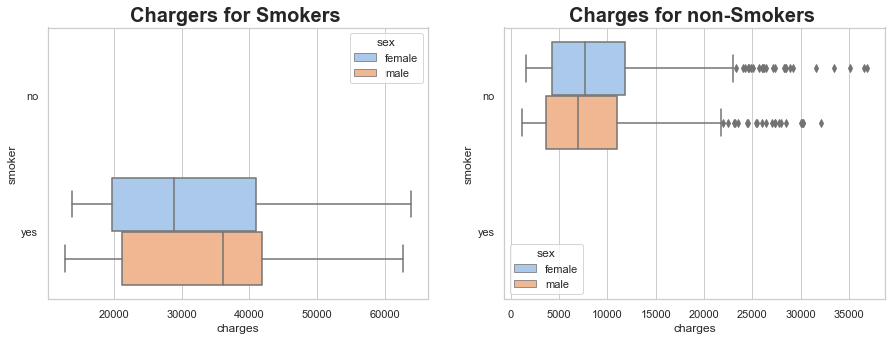

In [47]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y="smoker",x="charges",data=df[df["smoker"]=="yes"],hue="sex",palette="pastel",ax=ax[0])
ax[0].set_title("Chargers for Smokers ",size=20,weight="bold")

sns.boxplot(y="smoker",x="charges",data=df[df["smoker"]=="no"],hue="sex",palette="pastel",ax=ax[1])
ax[1].set_title("Charges for non-Smokers ",weight="bold",size=20)

# 1.Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

# Step 1: Define null and alternative hypotheses

H0: Medical claims are dependent on Smokers

H1: Medical claims are independent on Smokers



# Step 2: Decide the significance level:

Here we select α= 0.05 as per 95% Confidence Level requirement in the question.

# Step 3 : Identify the test statistic:

 * We can go about using t -test.

# Step 4: Calculate p value :

In [111]:
x = np.array(df[df['smoker'] == 'yes']['charges'])
y = np.array(df[df['smoker'] == 'no']['charges'])
t,p_value = stats.ttest_ind(x,y,axis =0)
if p_value <0.05:
    print("Medical claims are dependent on Smokers(accept H0)")
else:
    print("Medical claims are independent on Smokers(reject H0)")

Medical claims are dependent on Smokers(accept H0)


Observations:
    * The charges costs higher for  smokers than non-smokers.

# Observations on Charges vs Age across Smokers and Non-Smokers:

Text(33.50725277777779, 0.5, 'Charges')

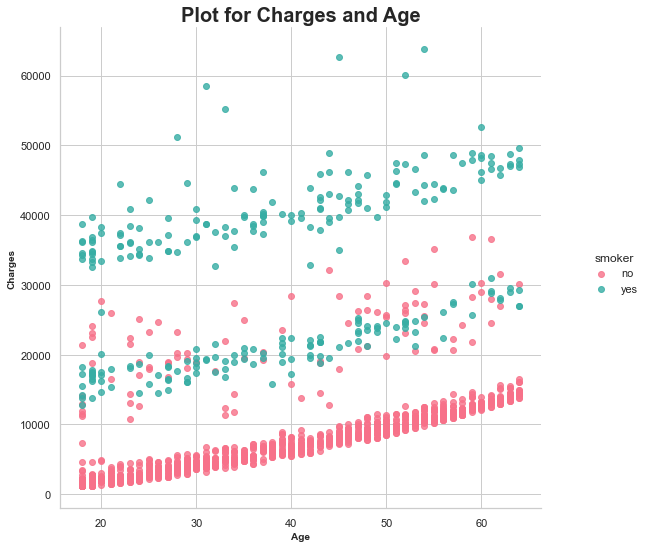

In [50]:
sns.lmplot(y="charges",x="age",hue="smoker",data=df,fit_reg=False, palette = "husl")
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title("Plot for Charges and Age",size=20,weight="bold" )
plt.xlabel("Age",size=10,weight="bold")
plt.ylabel("Charges",size=10,weight="bold")

# Observations on Smoker Vs Gender and Regionwise Gender :

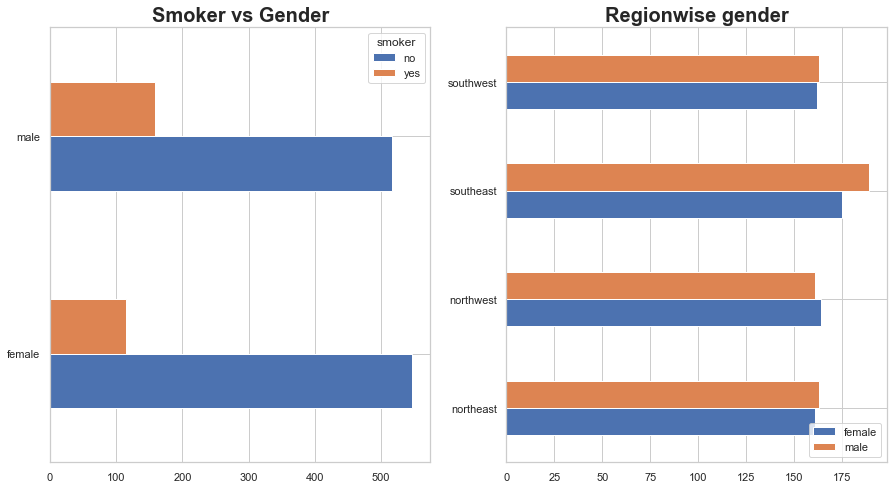

In [57]:
f,ax=plt.subplots(1,2,figsize=(15,8))

g1=df.groupby(["sex","smoker"])["age"].count().to_frame().reset_index()
g1.pivot("sex","smoker","age").plot(kind="barh",ax=ax[0])
ax[0].set_title("Smoker vs Gender",weight="bold",size=20)
ax[0].set_ylabel("")

g2=df.groupby(["sex","region"])["age"].count().to_frame().reset_index()
g2.pivot("region","sex","age").plot(kind="barh",ax=ax[1])
ax[1].set_title("Regionwise gender",weight="bold",size=20)
ax[1].set_ylabel("")


plt.legend(loc="lower right")

# Observations on Charges vs BMI across Smokers and Non-Smokers:

Text(0.5, 1.0, 'Plot for Charges & BMI')

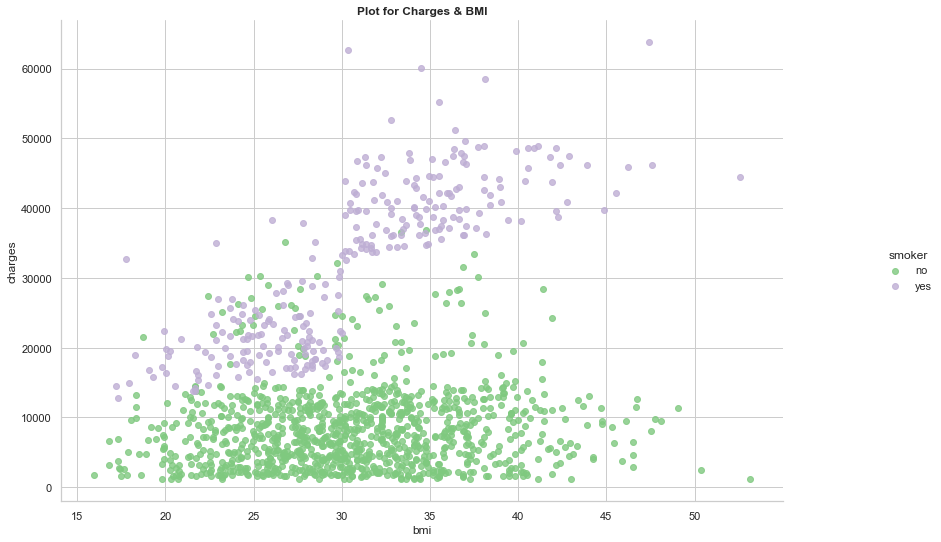

In [65]:
sns.lmplot(x="bmi",y="charges",hue="smoker",data=df,fit_reg=False,palette="Accent")
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.title("Plot for Charges & BMI",weight="bold")

# Analysis on Numerical variables with the Categorical variables using pairplots:  

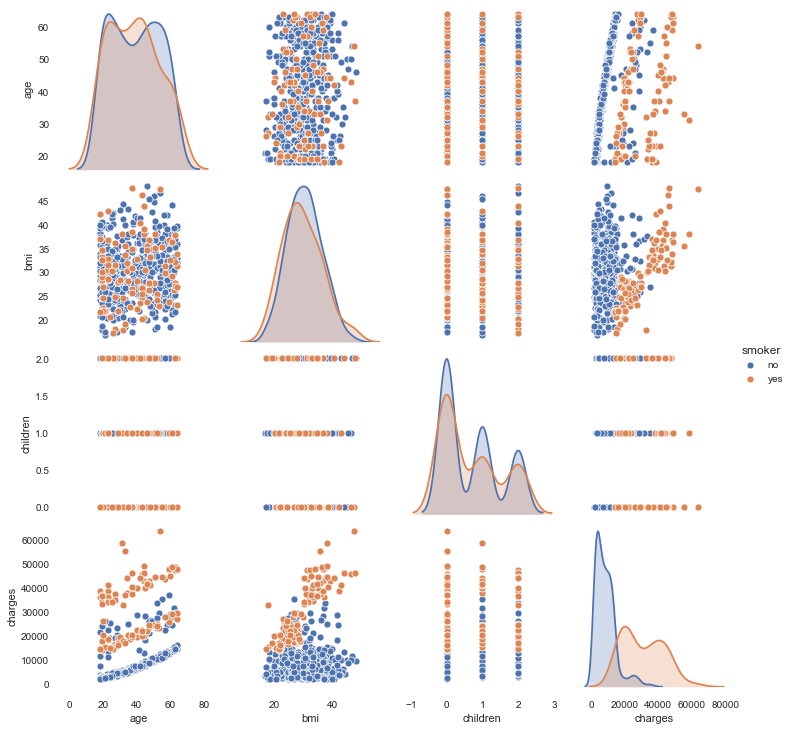

In [136]:
sns.pairplot(df,hue='smoker')
plt.show()

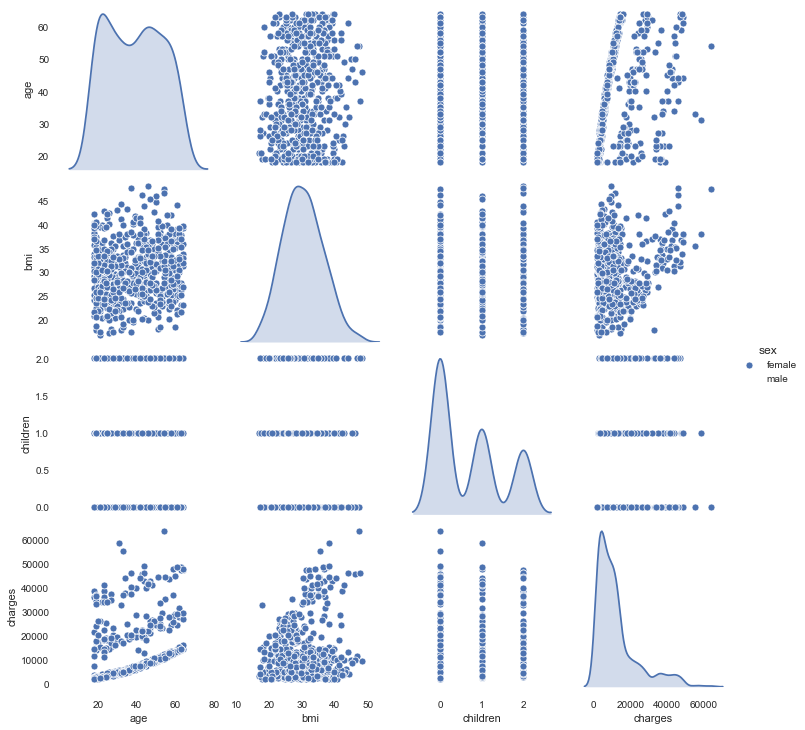

In [137]:
sns.pairplot(df,hue='sex')
plt.show()

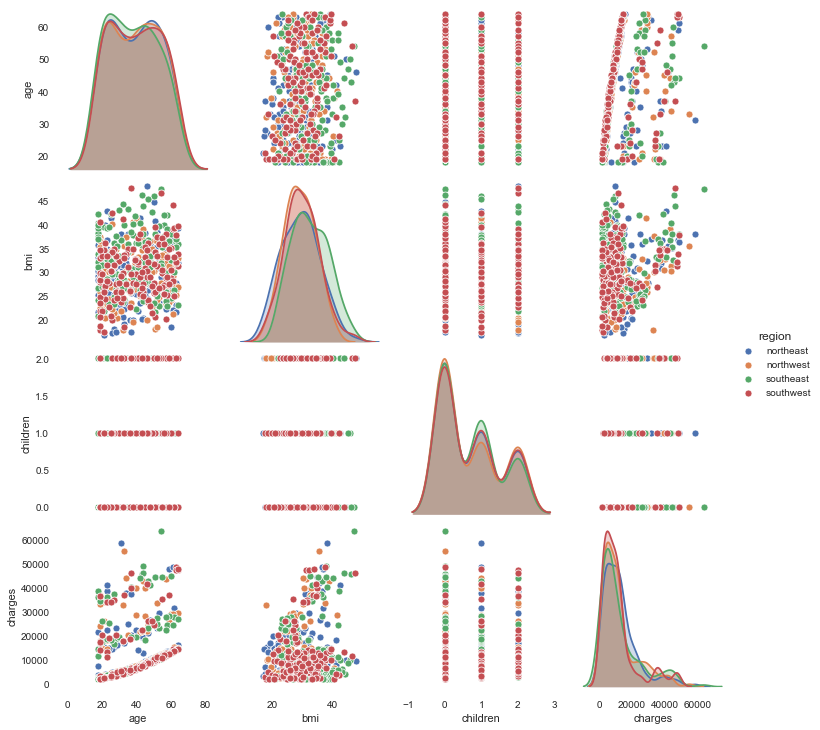

In [138]:
sns.pairplot(df,hue='region')
plt.show()

# 2.Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

# Observations on BMI vs Gender :

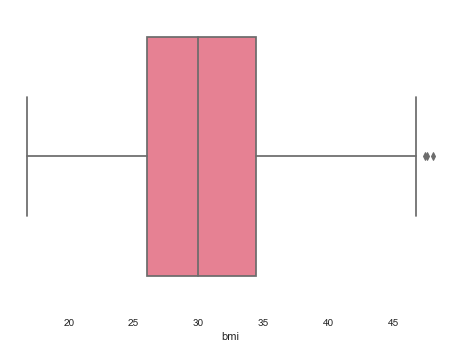

In [128]:
sns.boxplot(df['bmi'],hue=df['sex'],palette = "husl")
plt.show()

# Step 1: Define null and alternative hypotheses:

 H0 = "bmi has no effect on gender"
 
 H1 = "bmi has effect on gender" 

# Step 2 : Calculate the p - value :

In [130]:
x = np.array(df[df['sex'] == 'male']['bmi'])
y = np.array(df[df['sex'] == 'female']['bmi'])
t,p_value = stats.ttest_ind(x,y,axis =0)
if p_value <0.05:
    print("bmi has effect on gender(reject H0)")
else:
    print("bmi has no effect on gender(accept H0)")

bmi has no effect on gender(accept H0)


# 3.Is the proportion of smokers significantly different across different regions?

# Test of proportions:

* 'region' and 'smoker' are two categorical variables
* We want to see if the proportion of smokers in the female population is significantly different across different regions

# Step 1: Define null and alternative hypotheses:

Ho = The proportions are equal

Ha = The two proportions are not equal

# Step 2 : Calculate the proportions:

In [80]:
female_smokers = df[df['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = df[df['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = df.sex.value_counts()[1] # number of females in the data
n_males = df.sex.value_counts()[0] #number of males in the data
regions = df.region.value_counts()[0]  # number of regions

In [84]:
print([female_smokers, male_smokers] , [regions])
print(f' Proportion of smokers in regions = {round(115/324,2)}%, {round(159/324,2)}% respectively')

[115, 159] [324]
 Proportion of smokers in regions = 0.35%, 0.49% respectively


The proportions are different.

# Step 3 : Calculate the p - value and z -test statistic:

In [91]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [regions])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0005 the difference is significant. aka |We reject the null|


# 4.Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.


# Step 1: State the null and alternative hypothesis:

The null hypotheses for each of the sets are given below.

1) The population means of the BMI with no children is equal.

2) The population means of the  BMI with one child is equal.

3) The population means of the  BMI with two children are equal.

Alternative Hypothesis:

1) The population means of the BMI with no children is not equal.

2) The population means of the  BMI with one child is  not equal.

3) The population means of the  BMI with two children are  not equal.

# Step 2 : Decide the significance level:

Here we select α= 0.05 as per 95% Confidence Level requirement in the question.

# Step 3: Calculate p value:  

In [100]:
df = df[(df['children']<=2) & (df['sex']=='female')]
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


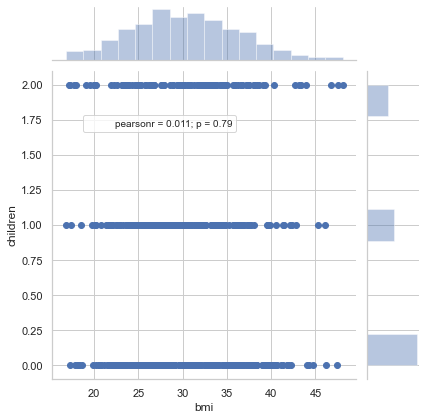

In [106]:
#plot the graph between bmi and children
jp = sns.jointplot(df['bmi'],df['children'])
jp = jp.annotate(stats.pearsonr, fontsize=10, loc=(0.1, 0.8))
plt.show()

* From the above, we can see that p_value is 0.79 meaning the The distribution of bmi across women with no children,one child and two children is same and we reject H0(Null Hypothesis)

In [112]:
!pip install pandas-profiling==2.8.0

In [113]:
from pandas_profiling import ProfileReport
# Use the original dataframe, so that original features are considered
prof = ProfileReport(df)
# to view report created by pandas profile
prof